In [1]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from keras.callbacks import ModelCheckpoint, History
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import tensorflow as tf
tf.config.list_physical_devices('GPU')

2024-07-05 15:03:42.585979: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-05 15:03:42.586104: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-05 15:03:42.634687: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-05 15:03:42.740218: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-05 15:03:44.025401: W tensorflow/compiler/tf2

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
combined = pd.concat([train,test])

In [5]:
#Drop all rows where SalePrice is NaN
combined.dropna(subset=['SalePrice'], inplace=True)
#combined.drop(axis=0, inplace=True, columns=['SalePrice'])

In [6]:
combined

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000.0
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000.0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125.0


In [7]:
cleaned_data = []
for name in combined.columns:
    if not combined[name].isnull().any():
        cleaned_data.append(name)


In [8]:
cleaned_df = combined[cleaned_data]

In [9]:
cleaned_df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000.0
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000.0
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500.0
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125.0


In [10]:
cleaned_df.to_csv('clean.csv')

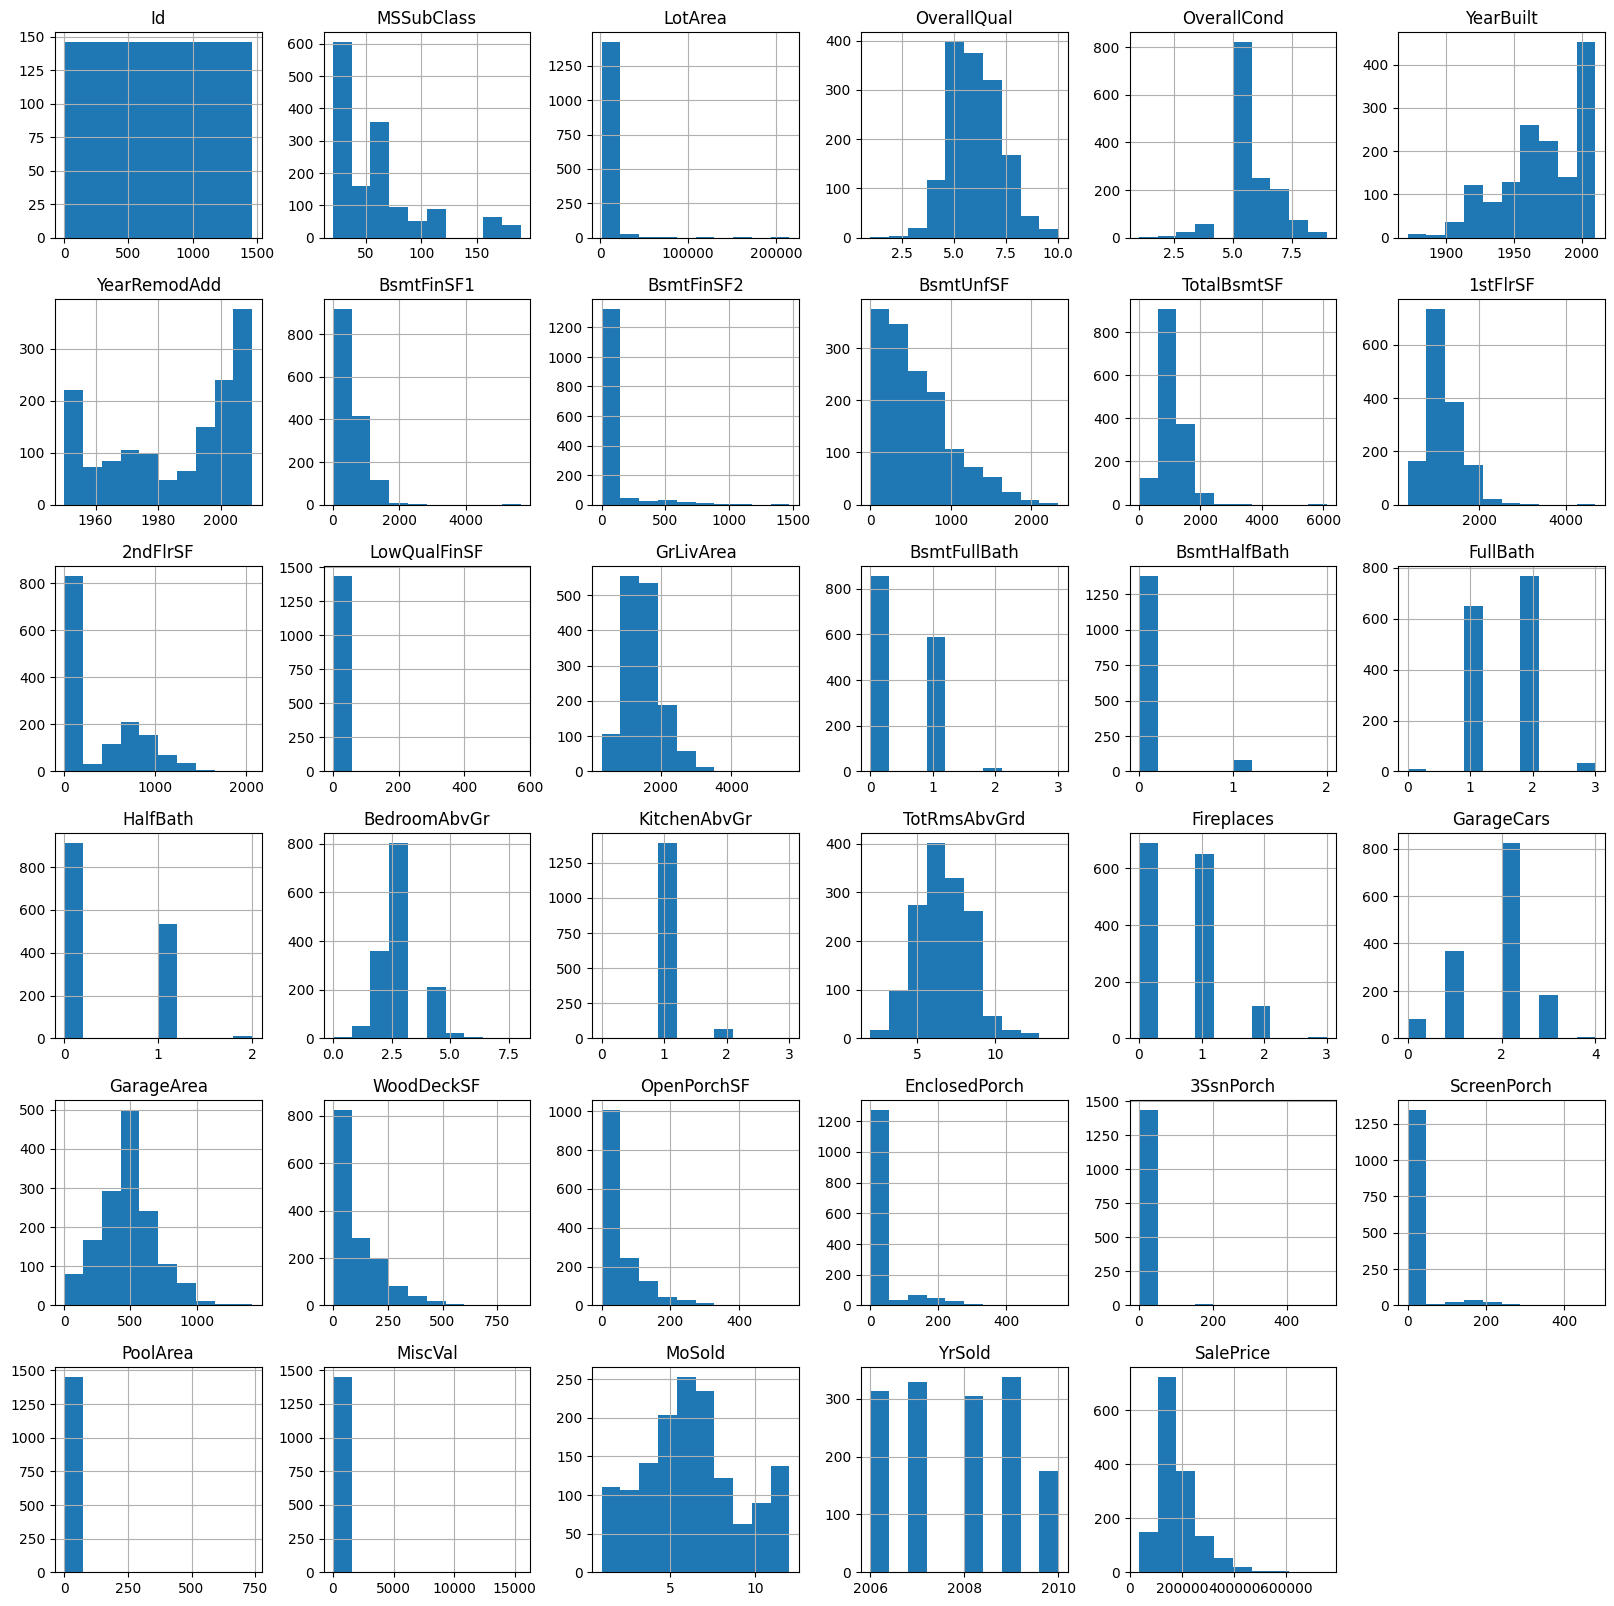

In [11]:
cleaned_df.hist(figsize=(20,20))
plt.show()

In [12]:
for col in cleaned_data:
    if cleaned_df[col].dtype=='object':
        print(col)
        tmp = pd.get_dummies(cleaned_df[col], prefix=col)
        cleaned_df = pd.concat([cleaned_df,tmp], axis=1)
        cleaned_df.drop([col], axis=1, inplace=True)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
ExterQual
ExterCond
Foundation
Heating
HeatingQC
CentralAir
KitchenQual
Functional
PavedDrive
SaleType
SaleCondition


In [13]:
cleaned_df

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706.0,0.0,150.0,...,False,False,False,True,False,False,False,False,True,False
1,2,20,9600,6,8,1976,1976,978.0,0.0,284.0,...,False,False,False,True,False,False,False,False,True,False
2,3,60,11250,7,5,2001,2002,486.0,0.0,434.0,...,False,False,False,True,False,False,False,False,True,False
3,4,70,9550,7,5,1915,1970,216.0,0.0,540.0,...,False,False,False,True,True,False,False,False,False,False
4,5,60,14260,8,5,2000,2000,655.0,0.0,490.0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0.0,953.0,...,False,False,False,True,False,False,False,False,True,False
1456,1457,20,13175,6,6,1978,1988,790.0,163.0,589.0,...,False,False,False,True,False,False,False,False,True,False
1457,1458,70,9042,7,9,1941,2006,275.0,0.0,877.0,...,False,False,False,True,False,False,False,False,True,False
1458,1459,20,9717,5,6,1950,1996,49.0,1029.0,0.0,...,False,False,False,True,False,False,False,False,True,False


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
cleaned_df.drop('Id', axis=1, inplace=True)

In [16]:
Y = cleaned_df['SalePrice']
X = cleaned_df.drop('SalePrice', axis=1)

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, train_size=0.8)

In [18]:
X_train

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1075,70,13125,7,6,1940,1984,410.0,0.0,390.0,800.0,...,False,False,False,False,False,False,False,False,True,False
1327,20,6600,5,9,1982,2008,641.0,0.0,175.0,816.0,...,False,False,False,True,False,False,False,False,True,False
760,20,9100,6,6,1959,1959,612.0,0.0,252.0,864.0,...,False,False,False,True,False,False,False,False,True,False
1403,20,15256,8,5,2007,2007,929.0,0.0,556.0,1485.0,...,False,False,False,True,False,False,False,False,True,False
1362,50,12513,4,4,1920,2007,0.0,0.0,715.0,715.0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,50,5436,4,8,1922,2007,735.0,0.0,61.0,796.0,...,False,False,False,True,False,False,False,False,True,False
1369,20,10635,8,5,2003,2003,370.0,972.0,315.0,1657.0,...,False,False,False,True,False,False,False,False,True,False
345,50,6435,6,5,1939,1950,0.0,0.0,972.0,972.0,...,False,False,False,True,False,False,False,False,True,False
1068,160,3964,6,4,1973,1973,837.0,0.0,105.0,942.0,...,False,False,False,True,False,False,False,False,True,False


In [19]:
Y_train

1075    219500.0
1327    130500.0
760     127500.0
1403    282922.0
1362    104900.0
          ...   
1385    125500.0
1369    232000.0
345     140200.0
1068    151400.0
378     394432.0
Name: SalePrice, Length: 1168, dtype: float64

In [20]:
NN_model = Sequential()

2024-07-05 15:05:27.127773: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-05 15:05:27.127986: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-05 15:05:27.128052: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-05 15:05:29.471841: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-05 15:05:29.472119: I external/local_xla/xla/stream_executor

In [21]:
#Input layer
NN_model.add(Dense(256,kernel_initializer='normal', activation='relu', input_dim = X_train.shape[1]))
#Hidden layers
NN_model.add(Dense(128, activation='relu'))
NN_model.add(Dense(128, activation='relu'))
NN_model.add(Dense(128, activation='relu'))
#Output layer
NN_model.add(Dense(1, activation='linear'))

In [22]:
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [23]:
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               55296     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 121345 (474.00 KB)
Trainable params: 121345 (474.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
!mkdir checkpoints
checkpoint_name = 'checkpoints/Weights-{epoch:03d}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
history = History()

mkdir: cannot create directory ‘checkpoints’: File exists


In [25]:
NN_model.fit(X_train.astype(float), Y_train.astype(float), epochs=500, batch_size=32, validation_split = 0.2, callbacks=[checkpoint, history])

Epoch 1/500


2024-07-05 15:10:39.237324: W external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:225] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-07-05 15:10:39.237445: W external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:228] Used ptxas at ptxas
2024-07-05 15:10:39.237518: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-07-05 15:10:39.347056: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-07-05 15:10:39.391646: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fc29aee8b80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-07-05 15:10:39.391694: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce 

27/30 [==========================>...] - ETA: 0s - loss: 155347.4219 - mean_absolute_error: 155347.4219
Epoch 1: val_loss improved from inf to 57302.34766, saving model to checkpoints/Weights-001.hdf5
30/30 [==============================] - 8s 18ms/step - loss: 147388.3906 - mean_absolute_error: 147388.3906 - val_loss: 57302.3477 - val_mean_absolute_error: 57302.3477
Epoch 2/500
15/30 [==============>...............] - ETA: 0s - loss: 57500.5781 - mean_absolute_error: 57500.5781

/home/scro4068/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


27/30 [==========================>...] - ETA: 0s - loss: 56397.5781 - mean_absolute_error: 56397.5781
Epoch 2: val_loss improved from 57302.34766 to 48900.65234, saving model to checkpoints/Weights-002.hdf5
30/30 [==============================] - 0s 12ms/step - loss: 55204.3477 - mean_absolute_error: 55204.3477 - val_loss: 48900.6523 - val_mean_absolute_error: 48900.6523
Epoch 3/500
30/30 [==============================] - ETA: 0s - loss: 44191.1562 - mean_absolute_error: 44191.1562
Epoch 3: val_loss improved from 48900.65234 to 43499.82031, saving model to checkpoints/Weights-003.hdf5
30/30 [==============================] - 0s 10ms/step - loss: 44191.1562 - mean_absolute_error: 44191.1562 - val_loss: 43499.8203 - val_mean_absolute_error: 43499.8203
Epoch 4/500
25/30 [========================>.....] - ETA: 0s - loss: 38891.4961 - mean_absolute_error: 38891.4961
Epoch 4: val_loss improved from 43499.82031 to 38747.07812, saving model to checkpoints/Weights-004.hdf5
30/30 [============

KeyboardInterrupt: 

In [29]:
NN_model.load_weights('checkpoints/Weights-278.hdf5')

In [30]:
NN_model.fit(X_train.astype(float), Y_train.astype(float), epochs=122, batch_size=32, validation_split = 0.2, callbacks=[checkpoint, history])

Epoch 1/122
30/30 [==============================] - ETA: 0s - loss: 13803.1094 - mean_absolute_error: 13803.1094
Epoch 1: val_loss did not improve from 18746.82617
30/30 [==============================] - 0s 9ms/step - loss: 13803.1094 - mean_absolute_error: 13803.1094 - val_loss: 19576.3555 - val_mean_absolute_error: 19576.3555
Epoch 2/122
29/30 [============================>.] - ETA: 0s - loss: 12967.4980 - mean_absolute_error: 12967.4980
Epoch 2: val_loss did not improve from 18746.82617
30/30 [==============================] - 0s 11ms/step - loss: 12937.8467 - mean_absolute_error: 12937.8467 - val_loss: 19390.8359 - val_mean_absolute_error: 19390.8359
Epoch 3/122
24/30 [=======================>......] - ETA: 0s - loss: 13003.7383 - mean_absolute_error: 13003.7383
Epoch 3: val_loss did not improve from 18746.82617
30/30 [==============================] - 0s 9ms/step - loss: 12862.4268 - mean_absolute_error: 12862.4268 - val_loss: 20095.5020 - val_mean_absolute_error: 20095.5020
Epo

/home/scro4068/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 44: val_loss did not improve from 18517.75000
30/30 [==============================] - 0s 9ms/step - loss: 12682.0215 - mean_absolute_error: 12682.0215 - val_loss: 19840.7734 - val_mean_absolute_error: 19840.7734
Epoch 45/122
23/30 [======================>.......] - ETA: 0s - loss: 12391.3027 - mean_absolute_error: 12391.3027
Epoch 45: val_loss did not improve from 18517.75000
30/30 [==============================] - 0s 9ms/step - loss: 12049.0742 - mean_absolute_error: 12049.0742 - val_loss: 20678.7930 - val_mean_absolute_error: 20678.7930
Epoch 46/122
24/30 [=======================>......] - ETA: 0s - loss: 14005.6836 - mean_absolute_error: 14005.6836
Epoch 46: val_loss did not improve from 18517.75000
30/30 [==============================] - 0s 9ms/step - loss: 13615.7773 - mean_absolute_error: 13615.7773 - val_loss: 20315.1367 - val_mean_absolute_error: 20315.1367
Epoch 47/122
30/30 [==============================] - ETA: 0s - loss: 14159.2871 - mean_absolute_error: 14159.28

In [32]:
len(history.history['loss'])

463

In [33]:
with open('checkpoints/training_history', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [34]:
best_epoch = np.argmin(history.history['val_loss'])+1

In [35]:
best_epoch

431

In [38]:
NN_model.load_weights('checkpoints/Weights-090.hdf5')

In [40]:
prediction = NN_model.predict(X_test.astype(float))

10/10 [==============================] - 0s 3ms/step


In [41]:
from sklearn.metrics import mean_absolute_error, r2_score

In [42]:
mae = mean_absolute_error(Y_test, prediction)
r2 = r2_score(Y_test, prediction)

In [43]:
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Absolute Error: 15420.567864404966
R2 Score: 0.8814370917062913


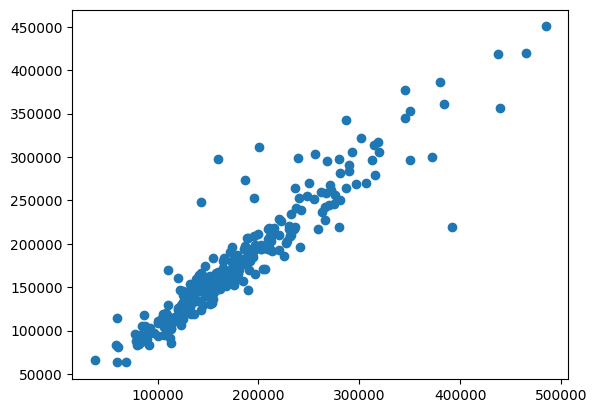

In [46]:
plt.scatter(Y_test, prediction)
plt.show(   )

In [47]:
from xgboost import XGBRegressor
XGBModel = XGBRegressor()

In [49]:
XGBModel.fit(X_train,Y_train , verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [50]:
XGBpredictions = XGBModel.predict(X_test)

In [51]:
mae = mean_absolute_error(Y_test, XGBpredictions)
r2 = r2_score(Y_test, XGBpredictions)

In [52]:
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Absolute Error: 15186.858090753425
R2 Score: 0.9104868239897991


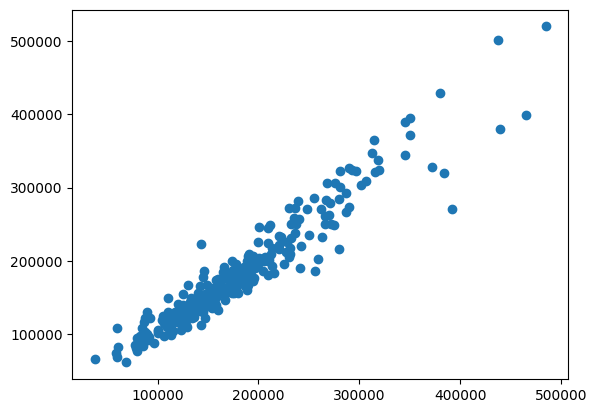

In [54]:
plt.scatter(Y_test, XGBpredictions)
plt.show()